<h1 style="font-size:30px;">Assignment: MLP on Fashion MNIST Dataset using Keras </h1>

You have already seen how to implement MLPs (Multi-Layer Perceptron) using the Keras framework. So, in this assignment, let’s go ahead and implement a simple MLP (Multi Layer Perceptron). 


We will be using the **Fashion MNIST Dataset**, which is a very popular and simple dataset to carry out classification tasks. We will be performing a multi-class claasification task using this dataset.

<img src="https://learnopencv.com/wp-content/uploads/2022/02/c4_02_fashion_mnist.jpg" width=700 align='center'><br/>

There are 10 classes. Each training and test example is a `28x28` image and is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



### Maximum Points: 30

| Section | Problem | Points |
|:------:|:--------|:------:|
|   1    | Validation Accuracy between 85% to 89% / > 89% | 10 / 20 | 
|   2    | Model Predictions on sample input      | 10 | 



## Problem Description

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">1. Implement the MLP Model</font>

Here, the task is to classify objects in a dataset, so you need to implement a simple MLP model with 10 output classes. Ensure it’s a very simple model that contains only a few `Dense` layers, with a minimal number of nodes/units.

**Note: Remember to use `softmax` activation for the last Dense layer.**



### <font style="color:rgb(50,120,230)">2. Getting the Desired accuracy on Test Data</font>

Once you have defined the model, you can train it. To get better accuracy, experiment with the learning rate and the number of epochs. You might also need to tweak the model architecture a bit as well.

The advantage of opting for a very simple dataset is that your model can perform very well even with very few `Dense` layers.

Here are some hints to improve the accuracy:
- Train for a longer duration
- Try with different learning rates (try reducing the learning rate as well)

You need to achieve **at least 85% test accuracy** on the test data to score **10 points**. If you achieve **more than 89% test accuracy**, you will receive the full **20 points**.


### <font style="color:rgb(50,120,230)">3. Model Prediction</font>

Once you complete the training and get the desired accuracy, you need to implement a simple prediction function. This is where your trained model should output the class label, given a sample input. 

Another **10 points** have been assigned for this section.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import ssl
from dataclasses import dataclass

import numpy as np
import os

import matplotlib.pyplot as plt

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

**Load the Fashion MNIST dataset from `tensorflow.keras.datasets`**

The training set contains `60000` samples while that of the test set containing `10000` samples.

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train, X_test = X_train.astype('float32') / 255., X_test.astype('float32')/255.

## 1 Model Training [20 Points]

All training parameters are defined here. So, this is where you can improve your accuracy and also the architecture.

Here are a few hints on to improve the accuracy:
- Train for a longer duration
- Try with different learning rates
- Try increasing the number of nodes/units in the Dense layers

You need to achieve **at least 85% accuracy** on the **test data** in order to score **10 points**. If you achieve **more than 89% test accuracy**, you end up with a full **20 points**.

In [6]:
is_training = True

In [11]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 32  
    epochs_count: int = 2  
    learning_rate: float = 0.1 
    
    # update changed parameters in the below coding block.
    
    ###
    batch_size: int = 32  
    epochs_count: int = 100
    learning_rate: float = 0.001
    optimizer_type: str = 'Adam'
    ###


### 1.1 Model Definition

You need to define your model here. Recall that each image in the dataset has a size of `28 x 28`, so your `input_shape` should have a size of: `(28,28)`. Also, don’t forget, you need to implement a very simple MLP here, with only a few `Dense` layers. Have a look at this block diagram representing a simple MLP. 

<img src = "https://learnopencv.com/wp-content/uploads/2022/02/c4_02_mlps_fashion_mnist.png" width=950 align='center'><br/>

The time required to train your model on the course site should be roughly **2-3 minutes**.


**Note: Remember to use a `softmax` activation for the output layer.**

In [12]:
def get_model():
    '''
    You need to define your MLP model here.
    '''
    
    model = tf.keras.Sequential()
    
    ###
    # add 1st flatten layer
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    
    # add hidden layers
    model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))

    # Output layer
    model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

    
    ###
    
    return model

### 1.2 Display the model

In [13]:
tf.random.set_seed(42)

model_fmnist = get_model()

model_fmnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### 1.3 Create directory to save final model

In [14]:
if not os.path.exists('models'):
    os.makedirs('models')

### 1.4 Main

Let’s use the configuration parameters defined above and start training.

In [15]:
def compile_and_train_model(train_set, test_set, model, training_configuration):
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=training_configuration.learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'],
                 )
   
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("./models/fashion_mnist_final.h5", monitor= "val_accuracy",
                                                   save_best_only=True, mode= "max")
    
    history = model.fit(train_set[0],train_set[1],
                        batch_size = training_configuration.batch_size,
                        epochs=training_configuration.epochs_count,
                        validation_data=test_set,
                        callbacks=[checkpoint_callback,]
                       )
    
    return model, history

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 1.5 Start training

In [16]:
training_configuration = TrainingConfiguration()

train_set = (X_train, y_train)
test_set = (X_test, y_test)

if is_training:
    model_final, training_results = compile_and_train_model(train_set, test_set, model_fmnist, training_configuration)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4969 - accuracy: 0.8235 - val_loss: 0.4130 - val_accuracy: 0.8492
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3658 - accuracy: 0.8662 - val_loss: 0.4377 - val_accuracy: 0.8494
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3300 - accuracy: 0.8779 - val_loss: 0.4064 - val_accuracy: 0.8528
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8863 - val_loss: 0.3591 - val_accuracy: 0.8702
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.8916 - val_loss: 0.3589 - val_accuracy: 0.8716
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8971 - val_loss: 0.3605 - val_accuracy: 0.8658
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.9010 - val_loss: 0.3895 - val_ac

### 1.6 Load best performing model

In [17]:
model_final.load_weights("./models/fashion_mnist_final.h5")

### 1.7 Plot Loss

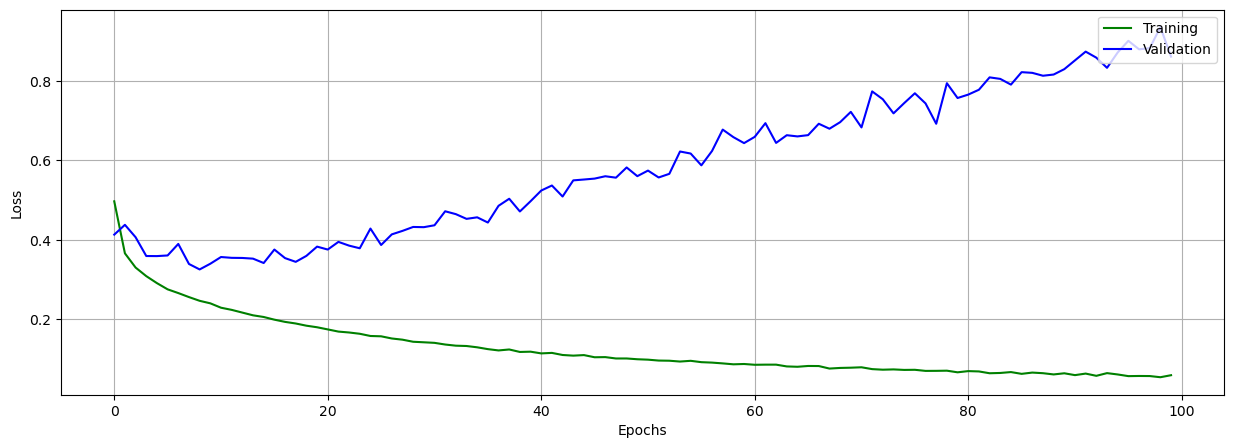

In [18]:
plt.figure(figsize=[15,5])
plt.plot(training_results.history['loss'], 'g')
plt.plot(training_results.history['val_loss'], 'b')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['Training', 'Validation'], loc='upper right');
plt.grid(True)

### 1.7 Plot Accuracy

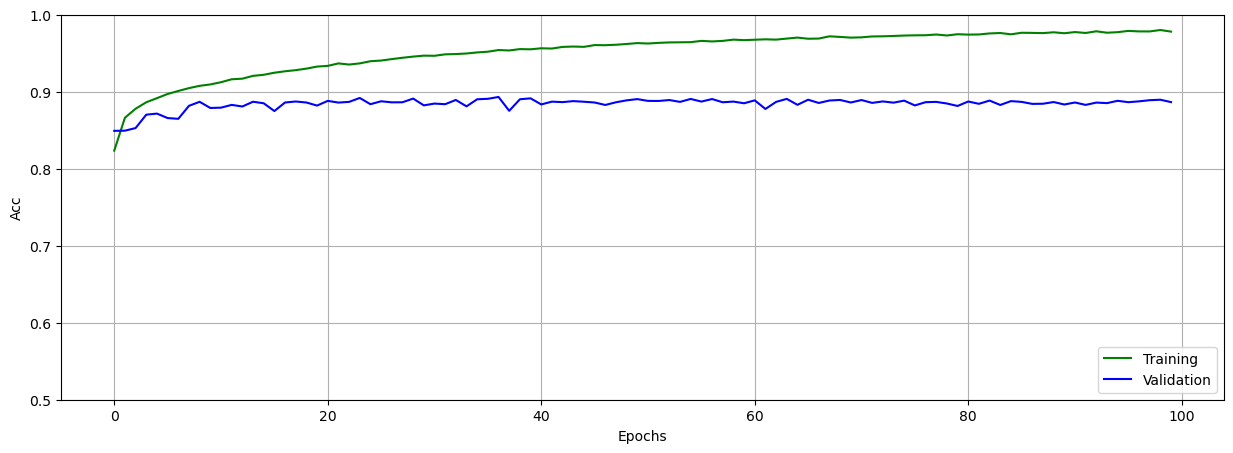

In [19]:
plt.figure(figsize=[15,5])
plt.plot(training_results.history['accuracy'], 'g')
plt.plot(training_results.history['val_accuracy'], 'b')

plt.ylim([0.5, 1])

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend(['Training', 'Validation'], loc='lower right');
plt.grid(True)

## 2. Obtain Model Predictions [10 Points]

Next,  use your trained model to obtain predictions for some sample data. You will recived **10 points** for a correct implementation of the  `cls_predictions` function.

**Note: The `sample_data` argument in the `cls_predictions` function is not a input batch; but rather a single input sample.**

You may find the [model.predict](https://keras.io/api/models/model_training_apis/) , [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), [np.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) and [np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html) functions useful.

In [20]:
def cls_predictions(model, sample_data):
    
    '''
    The predictions function should be able to return the correct class label predicted by the model given a 
    sample_data.
    
    Args:
        model: The model which is being trained on the given dataset.
        sample_data: (np.ndarray) sample data on which the model is required to predict on
                      size: (28,28)
        
        Remember that the model accepts the input in a batch
    
    Returns:
        cls_idx: int ---> returns the class index for the sample_data
    '''
    
    cls_idx = None
    
    ###
    # Reshape the sample_data to have a batch dimension using tf
    sample_data_expanded = tf.expand_dims(sample_data, axis=0) 

    # Predict using the model
    predictions = model.predict(sample_data_expanded)

    # Get the class index with the highest probability using tf
    cls_idx = tf.argmax(predictions, axis=1).numpy()[0] # Convert tensor to numpy and then retrieve the value

    ###
    
    return cls_idx
    

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Now let's visualize some sample data**

1/1 [==============================] - 0s 15ms/step


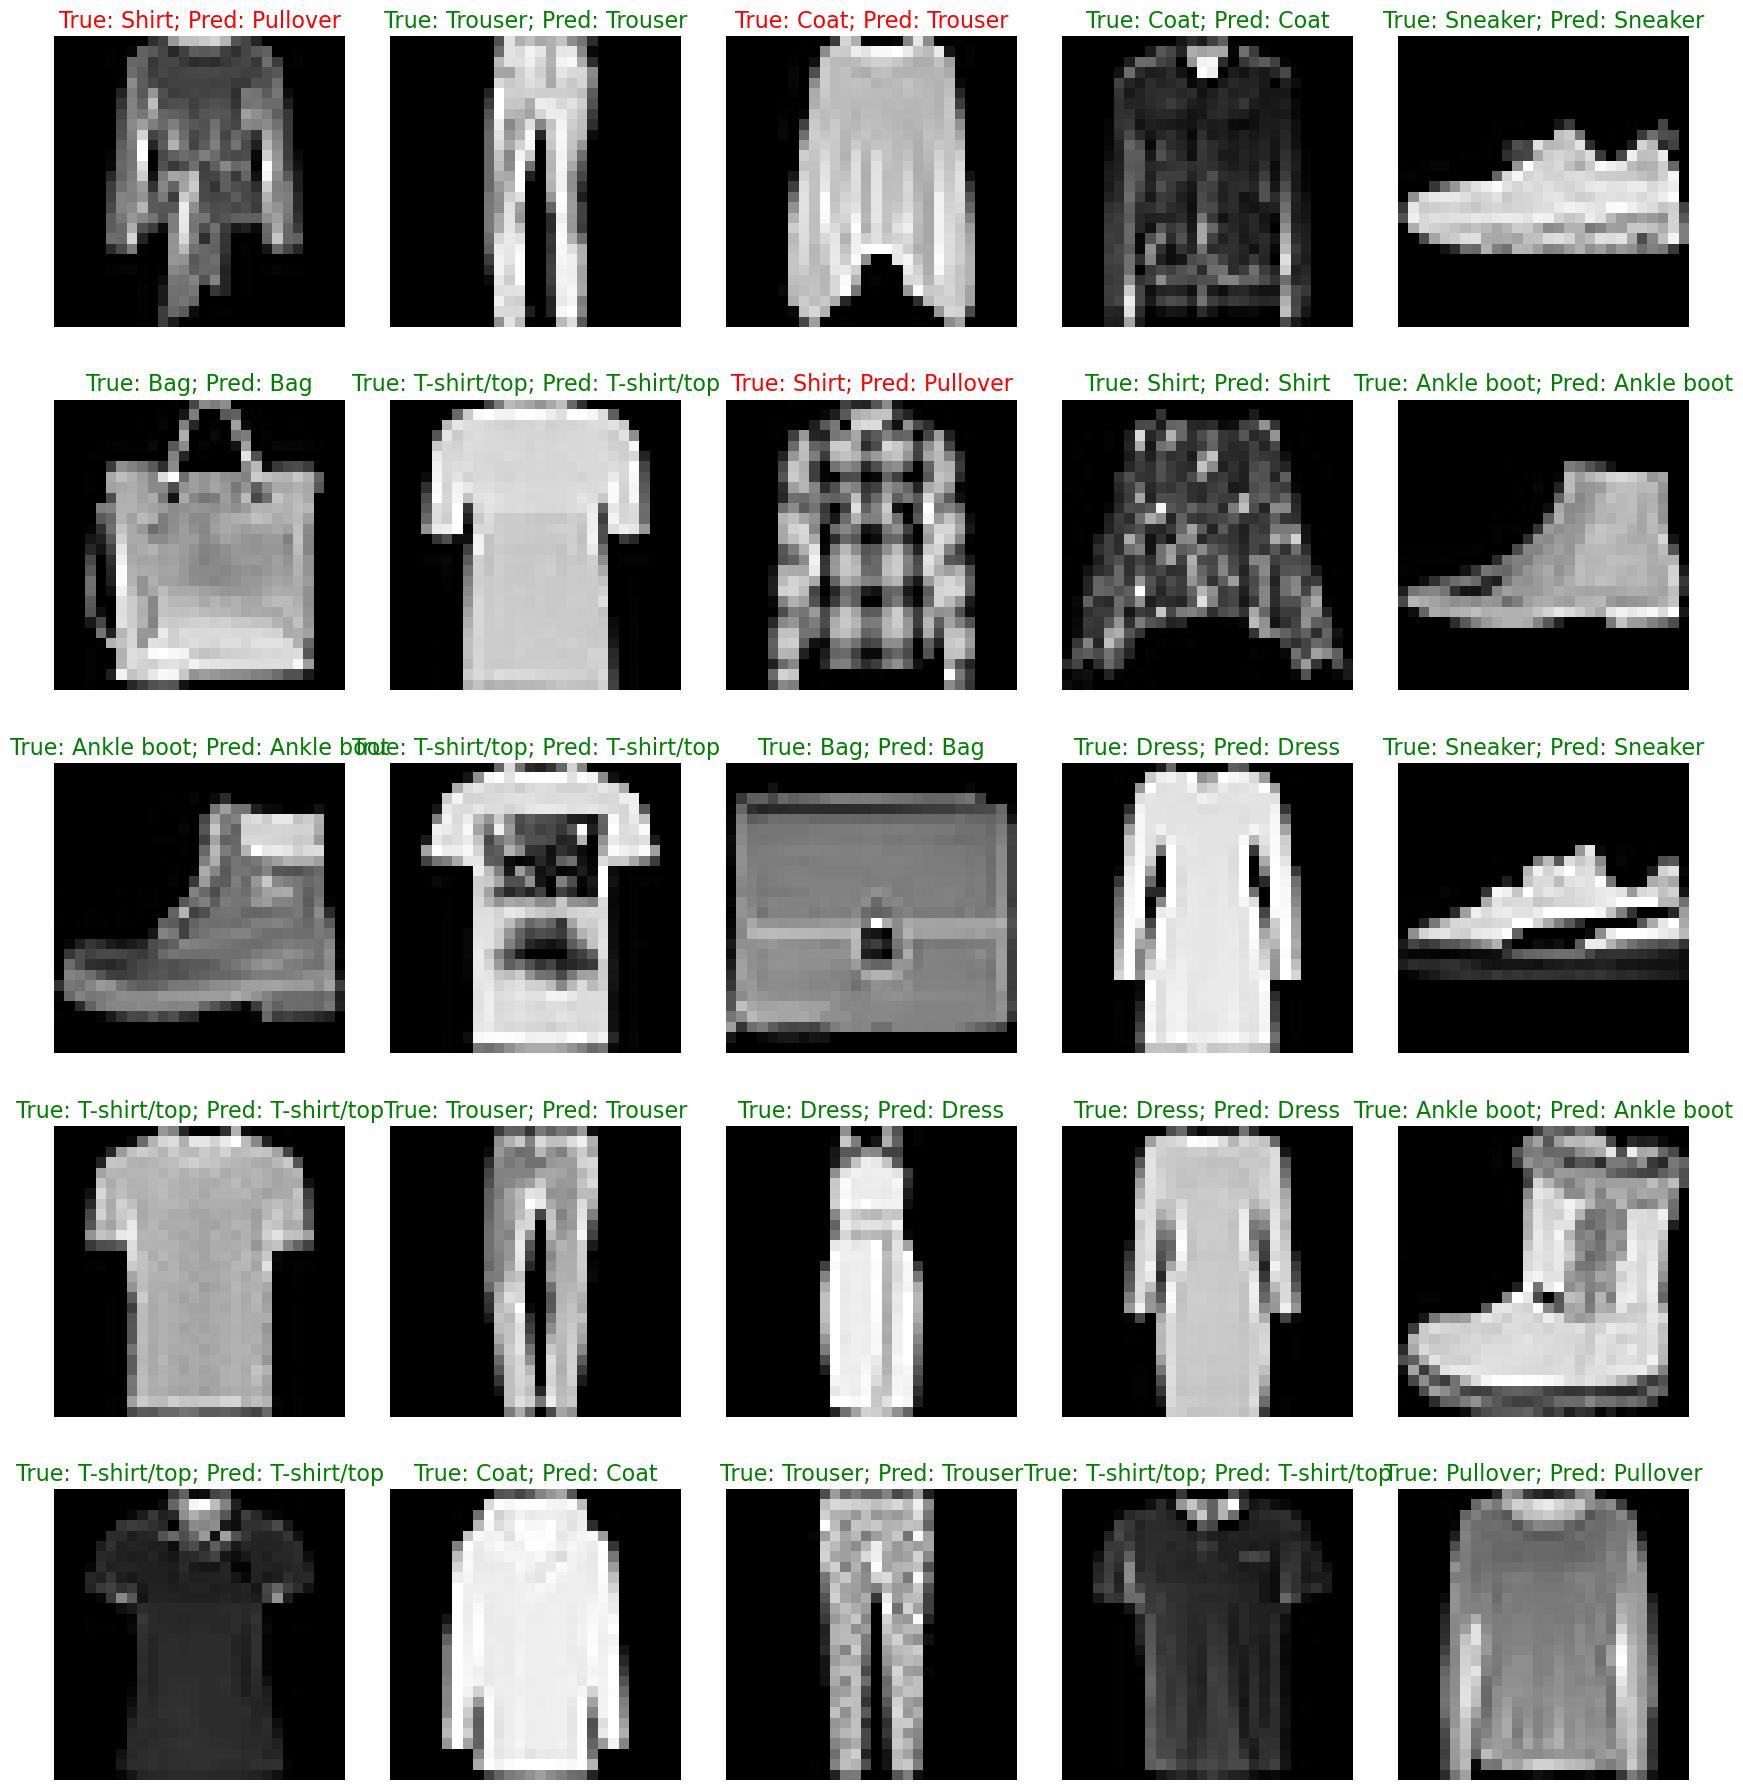

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 5

num_samples = num_rows * num_cols
sample_index = np.random.randint(0, 10000, num_samples)

X_sample = X_test[sample_index]
gt_sample = y_test[sample_index]

plt.figure(figsize=(24, 18))
for i, sample in enumerate(X_sample):
    plt.subplot(num_rows, num_rows, i+1)
    plt.axis('off')
    plt.imshow(sample, cmap='gray')
    gt_class = class_names[gt_sample[i]]
    pred_class = class_names[cls_predictions(model_final, sample)]
    
    title = 'True: ' + str(gt_class) + '; Pred: ' + str(pred_class)
    title_obj = plt.title(title, fontdict={'fontsize':16})
        
    if gt_class == pred_class:
        plt.setp(title_obj, color='g')
    else:
        plt.setp(title_obj, color='r')
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.8, wspace=0.0, hspace=0.25)
plt.show()

## 3 Conclusion

In this notebook, we have seen that it is a bit difficult to obtain more than 90% validation accuracy. However, in the next module we will learn about Convolutional Neural Networks (CNNs) and other training techniques which will significantly help improve the validation accuracy beyond 95%!